In [1]:
# Standard Packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys , os

In [2]:
# Custom modules
sys.path.append(r'G:\Research\AI_STM\NanoscoPy') # Specifies custom module directory
import nanoscopy as nano

C:\Users\Darian\anaconda3\envs\nanoscopy\lib\site-packages\pySPM\utils\misc.py:135: UserWarning: the library tqdm cannot be found. All progressbar will be disabled.
  warn("the library tqdm cannot be found. All progressbar will be disabled.")


In [49]:
file_path = r'C:\Users\Darian\Downloads\2021-09-15_ds-1_wse2(sl333)_exf_019.dat'

In [50]:
data = pd.read_csv(file_path , sep = '\t' , header = None)
data.head()

,0,1
0,0.000000,2.0
1,0.144753,1.0
2,0.289507,0.0
3,0.434260,2.0
4,0.579013,1.0


In [51]:
spec = nano.raman.analysis.Spectrum(data.to_numpy())

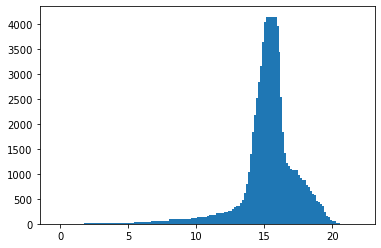

In [52]:
plt.bar(spec.data_x, spec.data_y)
plt.show()

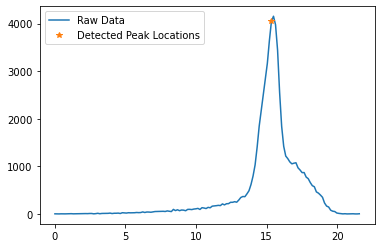

In [53]:
# Locate the peaks in the data and determine parameter values.
peak_indices , peak_properties = spec.locate_peaks(wlen=10, width=3)

# Generate a plot to visualize the peak detection results
plt.plot(spec.data_x,spec.data_y,label='Raw Data')
plt.plot(spec.data_x[peak_indices],spec.data_y[peak_indices],'*',label='Detected Peak Locations')
plt.legend()

new_model_parameters = spec.generate_model_parameters(peak_indices,peak_properties)

spec.make_composite_model(new_model_parameters)

In [67]:
model_WSe2_13 = [
    {'name':'left',
    'type': 'Gaussian',
    'center': {'value':10},
    'height': {'value':1200},
    'FWHM': {'value':5} 
    } ,
    {'name':'right',
    'type': 'Lorentzian',
    'center': {'value':13},
    'height': {'value':2200},
    'FWHM': {'value':3} 
    }
    ]

model_WSe2_19 = [
    {'name':'left',
    'type': 'Gaussian',
    'center': {'value':15},
    'height': {'value':4000},
    'FWHM': {'value':5} 
    } ,
    {'name':'right',
    'type': 'Gaussian',
    'center': {'value':18},
    'height': {'value':1000},
    'FWHM': {'value':5} 
    }
    ]

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

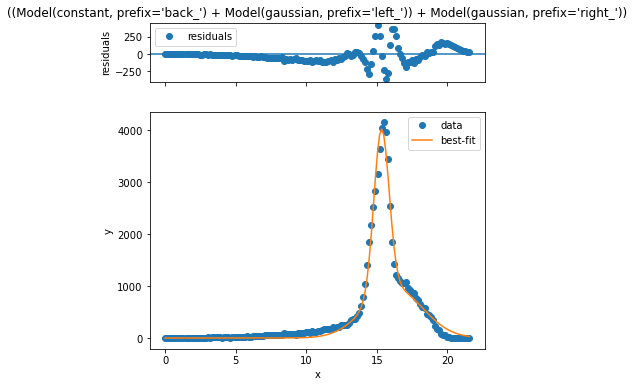

In [68]:
spec.make_composite_model(model_WSe2_19)
spec.fit_spectrum()
spec.results.plot()

In [69]:
# Print out the fit report generated by lmfit
print(spec.results.fit_report())

[[Model]]
    ((Model(constant, prefix='back_') + Model(gaussian, prefix='left_')) + Model(gaussian, prefix='right_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 881
    # data points      = 150
    # variables        = 7
    chi-square         = 1727176.41
    reduced chi-square = 12078.1567
    Akaike info crit   = 1416.70448
    Bayesian info crit = 1437.77893
##  Warning: uncertainties could not be estimated:
    back_c:           at initial value
    back_c:           at boundary
    left_amplitude:   at boundary
    right_center:     at boundary
[[Variables]]
    back_c:           1.0000e-06 (init = 1e-06)
    left_amplitude:   4257.86814 (init = 21289.34)
    left_center:      15.3315845 (init = 15)
    left_sigma:       0.53902935 (init = 2.123305)
    right_amplitude:  4883.11137 (init = 5322.335)
    right_center:     16.2000000 (init = 18)
    right_sigma:      2.03541653 (init = 2.123305)
    left_fwhm:        1.26931709 == '2.3548200*left_

In [70]:
results = spec.results
left_center = results.values['left_center']
right_center = results.values['right_center']
center_offset = right_center - left_center
center_offset

0.868415458721671

In [71]:
comps = spec.results.eval_components()

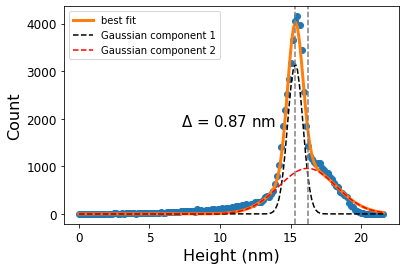

In [75]:
plt.plot(spec.data_x, spec.data_y, 'o')
plt.plot(spec.data_x, spec.results.best_fit, label='best fit', linewidth=3.0)
plt.plot(spec.data_x, comps['left_'], 'k--', label='Gaussian component 1')
plt.plot(spec.data_x, comps['right_'], 'r--', label='Gaussian component 2')
plt.axvline(x=left_center, color='grey', linestyle='--')
plt.axvline(x=right_center, color='grey', linestyle='--')
plt.annotate(r'$\Delta$ = {:.2f} nm'.format(center_offset), 
    xy=(0.35, 0.45),
    xycoords='axes fraction',
    size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Height (nm)', size = 16)
plt.ylabel('Count', size = 16)
plt.legend(loc='best')
plt.show()